# Programmer Support Tutorial 3: Python Modules

## Importing Modules

Often, for more advanced programming some of the functionnality you are looking for to accomplish various tasks may already exist and be available to you in the form of **modules**.

To load a module into python, you can call

            import numpy
            
where here we are loading the module **numpy**. You can then access functions, objects and variables from that module by referrencing the module beforehand. 

            numpy.zeros(10)

In some cases it may be easier to define a shortand for the loaded module. This can be done as follows

            import numpy as np

allowing you to call elements of the module more easily

            np.zeros(10)
            
If you would only like to load in a particular subsection of a module you can also do that

            from numpy import zeros
            zeros(10)
            
Again, whatever you load in can be abbreviated

            from numpy import zeros as z
            z(10)
            
Some modules also contain modules nested within them and these can be loaded the same way as anything else can be loaded from the module:

            import numpy as np
            np.random.rand()
            
            from numpy import random
            random.rand()
            
            from numpy.random import rand
            rand()
            
Be careful when you load in anything to python that you don't overwrite previously defined variable you still need, and take care than new variable names do not replace your loaded modules

## Numpy

Numpy is easily one of the most important modules in python, and you will likely be loading it into most python scripts in astronomy.

Numpy contains many mathematical constants and functions that are not included in base python.

In [1]:
import numpy as np
from numpy import cos, sin, exp, log, sqrt, pi

cos(pi)

-1.0

### Arrays

One of numpy's biggest advantages is the introduction of a new type of object called **arrays**. In many ways these behave like vectors (1D), matrices (2D) and tensors (3D+) and allow you to perform mathematical operations on entire datasets at once, **much more quickly** than you otherwise could with a loop.

Last week I used the example below to show how to use a **for** loop:

In [2]:
L = []

for i in range(11):
    L.append(i**2)
    
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


Using numpy arrays, the same thing can be done much faster

In [3]:
x = np.arange(0, 11)
y = x**2
print(y)

[  0   1   4   9  16  25  36  49  64  81 100]


There are a few different ways that you can create an array. The first one is to convert something like a preexisting list or tuple using **array()**

In [4]:
l = np.array(L)
print(l)

[  0   1   4   9  16  25  36  49  64  81 100]


You can also generate arrays that start and end at certain values with **arange**, which you've already seen above and **linspace**. 

In the case of **arange**, you include a start value (by defaut assumed to be 0), a stop value and an increment (by default assumed to be 1). This will generate an array starting with the start value with each subsequent element increasing by the increment until just before the stop value is achieved or passed. 

In [5]:
np.arange(0.1, 1.2, 0.1) # start, stop, increment

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

Though it can be used in largely similar cases **linspace** is different in that it requires a start value, a stop value and a number of elements (by default assumed to be 50). It then generates an array including both the start and stop values with however many equally spaced elements

In [6]:
np.linspace(0.1, 1.1, 11) # start, stop, count

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

If you know how big you want your array to be (how many dimensions and how large along each dimension), you can also create placeholder arrays to be filled or modified later. 

In [10]:
shape = (3,5) # If you want the shape to be one dimensional, this can also be an integer scalar

z = np.zeros(shape)
o = np.ones(shape)
f = np.full(shape, 6.1)

print(z)
print(o)
print(f)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[6.1 6.1 6.1 6.1 6.1]
 [6.1 6.1 6.1 6.1 6.1]
 [6.1 6.1 6.1 6.1 6.1]]


Once you have your array defined, you can determine its dimensions (the number of axes) with the method **ndim**, its shape (the length of each axis) with the method **shape** and its size (the total number of elements) with the **size** method

In [11]:
print(z.ndim)
print(z.shape)
print(z.size)

2
(3, 5)
15


#### Math with arrays

Numpy arrays come with built in methods for determining common statistics of the values contained within, such as the mean, meadian, standard deviation, the sum and much more.

In [13]:
print(np.median(l))
print(np.mean(l))
print(np.std(l))
print(np.sum(z, axis=0))

25.0
35.0
32.83291031876401
[0. 0. 0. 0. 0.]


For arrays which are not one-dimensional, you can also specify the axis or axes along which you would like to perform many such numpy functions.

In [16]:
x = np.random.randint(low=0, high=10, size=(5,10))
print(x)
print('Sum along the row axis (yielding a sum for each column): ')
print(np.sum(x, axis=0))

[[7 5 4 7 1 1 9 9 1 4]
 [4 9 3 8 0 4 0 5 1 8]
 [3 0 0 8 1 9 4 1 3 5]
 [1 5 7 9 2 7 6 7 8 4]
 [9 1 5 8 0 5 1 8 3 3]]
Sum along the row axis (yielding a sum for each column): 
[24 20 19 40  4 26 20 30 16 24]


Similarly to integers, floats and complex, you can perform standard python mathematical operations (`+`, `-`, `*`, `/`, `**`, `//`, `%`, ...) on arrays. This behaves slightly differently however depending on if you are performing an operation between arrays of the same dimensions, arrays of difference dimensions or between an array and a scalar. 

The latter case, where you are operating on an array and a scalar, is the simplest. Here, the scalar operates on all elements of the array equally

In [17]:
x = np.random.randint(low=0, high=2, size=(2,3))

print('x: ')
print(x)

x*2

x: 
[[1 1 1]
 [1 0 1]]


array([[2, 2, 2],
       [2, 0, 2]])

When you operate on two arrays of different dimensions (ex. a 2D array and a 3D array or a 1D array and a 4D array), this is a fair bit more complicated. 

Consider two arrays **array1** and **array2**, which are N-dimensional and M-dimensional respectively. If N > M, then you can perform basic operations between them only if the shape of the last M axes of array1 is the same as the shape of array2.

This is likely very confusing without some examples... 
Lets try out a few!

In [21]:
shape1 = (2,4)
shape2 = (4)

x1 = np.random.randint(low=0, high=2, size=shape1)
x2 = np.random.randint(low=0, high=2, size=shape2)

print(f'x1: {x1.ndim}D, {x1.shape}')
print(x1)
print(f'x2: {x2.ndim}D, {x2.shape}')
print(x2)

x1+x2

x1: 2D, (2, 4)
[[1 0 0 1]
 [1 1 0 1]]
x2: 1D, (4,)
[0 1 0 1]


array([[1, 1, 0, 2],
       [1, 2, 0, 2]])

In the case of two arrays of the same dimension, the arrays **must** have the **same shape**, and if so then the operation is performed **element-wise** (meaning the elements in the same position are operated on each other one-to-one)

In [24]:
x1 = np.random.randint(low=0, high=2, size=(3,4))
x2 = np.random.randint(low=0, high=2, size=(3,4))

print(f'x1: {x1.ndim}D, {x1.shape}')
print(x1)
print(f'x2: {x2.ndim}D, {x2.shape}')
print(x2)

x1+x2

x1: 2D, (3, 4)
[[0 1 0 1]
 [0 0 1 0]
 [0 1 1 1]]
x2: 2D, (3, 4)
[[0 1 1 1]
 [0 0 1 0]
 [1 0 1 1]]


array([[0, 2, 1, 2],
       [0, 0, 2, 0],
       [1, 1, 2, 2]])

If you would like to do matix operations instead of the basic python scalar operations, you can also do these with numpy (**np.dot**, **np.inner**, **np.outer**, ...)

#### Array indexing

Similar to lists, numpy arrays can be indexed. However unlike lists, arrays are not necessarily only one-dimensional, and so can be indexed along each of their axes. 

Consider a 3D array a. To access the ith element in axis 0, the jth element in axis 1 and the kth element in axis 2, you can index a with

            a[i, j, k]
            
You can also index only certain axes at a time. If we would like the jth element of axis 1, we can do

            a[:,j]

When considering the axes for a 2D array, the indexing is the row axis first, then the column axis.

Note that generally, an array of data will have some interpretation for each axis and so it may be useful to think of indexing and slicing (see below) in terms of what the data represents. For instance an image may be a 2D array, with the axes being the horizontal direction and the the vertical direction respectively, with the numeric values being the brightness. If you only want to look at the brightness 30 pixels horizontally, you would index

            a[30,:]
            
which leaves a line of values in the vertical direction.

In [25]:
shape = (3,3,3)
x = np.random.randint(low=0, high=6, size=shape)

print(x)

[[[5 2 1]
  [3 3 3]
  [5 4 1]]

 [[3 2 2]
  [3 2 1]
  [3 0 4]]

 [[4 3 0]
  [3 1 1]
  [1 1 2]]]


In [28]:
print(x[0])
print()
print(x[:,0])
print()
print(x[...,0]) # note here I use ... to skip having to specify : on all the prior axes

[[5 2 1]
 [3 3 3]
 [5 4 1]]

[[5 2 1]
 [3 2 2]
 [4 3 0]]

[[5 3 5]
 [3 3 3]
 [4 3 1]]


#### Array slicing

Again, like lists, numpy arrays can be sliced. Once more, this can be done separately along each axis. To obtain a slice of axis 1 from element n to m, we can do

            a[:, n:m, :]
           
Similarly to lists, you can replace or the indexed or sliced elements in an array. 
This can be done with a scalar value, in which case the scalar replaces all elements in the index/slice.
Alternatively, if you replace the elements at an index/slice with another array, then the shape of the replacement must have the same shape as the index/slice.

Let's try some examples:

In [29]:
x = np.random.randint(low=0, high=6, size=shape)
print(x)

[[[3 1 0]
  [0 2 1]
  [2 1 2]]

 [[5 5 2]
  [0 5 4]
  [3 1 2]]

 [[0 3 2]
  [1 1 4]
  [0 3 4]]]


In [30]:
y = x.copy()

y[0,:,1] = -1  # filling in an index with -1
# y[1,-2:,-2:] = -1  # filling in a slice with -1

print(y)

[[[ 3 -1  0]
  [ 0 -1  1]
  [ 2 -1  2]]

 [[ 5  5  2]
  [ 0  5  4]
  [ 3  1  2]]

 [[ 0  3  2]
  [ 1  1  4]
  [ 0  3  4]]]


#### Array masking

The ability of numpy arrays to be indexed and sliced allows for something that lists cannot do, **masking**.

You can create a **mask** by checking some condition against the array as a whole. The mask is an array of booleans of the same shape as the array it is based off of. 

You can then index an array by its mask to look at or alter only the elements that satisfy the condition.

In [33]:
print(x)
y = x.copy()

m = x < 3 # defining the mask

y[m] = -1 # if you want to mask by the contrary of m, then you can do y[~m] = -1
y

[[[3 1 0]
  [0 2 1]
  [2 1 2]]

 [[5 5 2]
  [0 5 4]
  [3 1 2]]

 [[0 3 2]
  [1 1 4]
  [0 3 4]]]


array([[[ 3, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]],

       [[ 5,  5, -1],
        [-1,  5,  4],
        [ 3, -1, -1]],

       [[-1,  3, -1],
        [-1, -1,  4],
        [-1,  3,  4]]])

You can also combine masks together with logical statements:

In [35]:
print(x)
y = x.copy()

m1 = x == 0 # defining the first mask
m2 = x == 5 # defining the second mask

y[~(m1 + m2)] = -1 # "+" is analogous to "or" and "*" is analogous to "and" 
y

[[[3 1 0]
  [0 2 1]
  [2 1 2]]

 [[5 5 2]
  [0 5 4]
  [3 1 2]]

 [[0 3 2]
  [1 1 4]
  [0 3 4]]]


array([[[-1, -1,  0],
        [ 0, -1, -1],
        [-1, -1, -1]],

       [[ 5,  5, -1],
        [ 0,  5, -1],
        [-1, -1, -1]],

       [[ 0, -1, -1],
        [-1, -1, -1],
        [ 0, -1, -1]]])

### Reading and writing data with numpy

With numpy you can read (`data = np.load(<path/to/foo>)`) and write (`np.save(<path/to/foo>, data)`) data in numerous different data formats. Some of the most common formats you might encounter here are **csv**, **npy**, **npz**

## Pyplot

One of the most common modules used for plotting and visualizing data is called **pyplot**, which often comes packaged as a module inside **matplotlib**.

In [36]:
import matplotlib.pyplot as plt

The simplest use case here is simply plotting 1D data as a line. Here we'll start off by setting up some fake data to plot.

In [37]:
x_data = np.linspace(-10, 10, 100)

y_true = np.exp(-x_data**2)
y_err = np.random.normal(size=x_data.shape)/20

y_data = y_true + y_err

We can then plot this fake data using `plt.plot`. Here the only inputs that are absolutely necessary are the x and y data. 

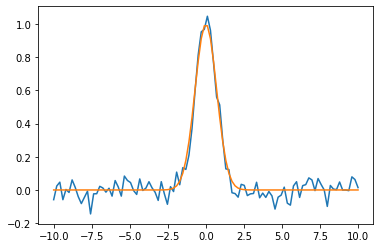

In [38]:
plt.plot(x_data, y_data)
plt.plot(x_data, y_true)

We also have quite a bit of flexibility to alter the plot so that it suis our purposes. 
Aspects such as the 
* size of the figure
* the bounds of the x and y axes
* labeling
* the style of lines or points 
    * marker
    * size/thickness
    * colour
    * transparency `alpha`
    * ...
* grid lines
* ...much, much more...
are all adjustable

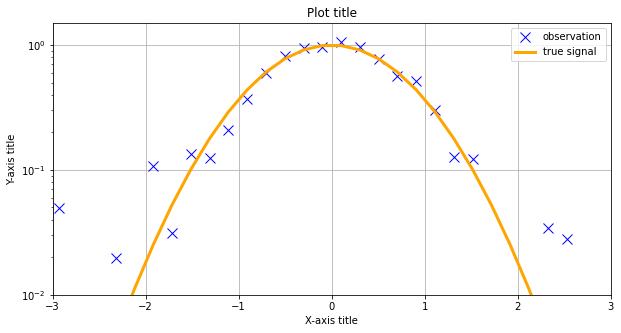

In [39]:
plt.figure('fake_gauss_data', figsize=[10,5]) 

plt.plot(x_data, y_data, 
         'x', markersize=10, c='blue',
         label='observation'
        )
plt.plot(x_data, y_true, 
         linestyle='-', linewidth=3, c='orange', 
         label='true signal'
        )

# Set Figure titles
plt.title('Plot title')
plt.ylabel('Y-axis title')
plt.xlabel('X-axis title')

plt.grid() # Create a grid

plt.xlim(-3, 3) # Set the bounds of the x-axis
plt.ylim(0.01, 1.5) # Set the bounds of the y-axis
plt.yscale('log') # Set the y-axis to be logarithmic

plt.legend(loc=0) # Place the legend for labeled data

You can also plot 2D data with `plt.imshow()`. Lets generate some 2D data as an example:

In [40]:
Nrow = 100
Ncol = 70

rows = np.linspace(-5, 5, Nrow)
cols = np.linspace(-3.5, 3.5, Ncol)

R = rows[:,np.newaxis].repeat(Ncol, axis=1)
C = cols[np.newaxis,:].repeat(Nrow,axis=0)

model = np.exp(-(R+C)**2)
data_error = np.random.normal(size=(Nrow,Ncol))/3
data = model + data_error

By default here all you need is a 2D array of some data

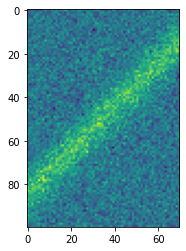

In [41]:
plt.imshow(data)

Again though, we can change things to make this a bit more to our liking

Text(0, 0.5, 'Y-data')

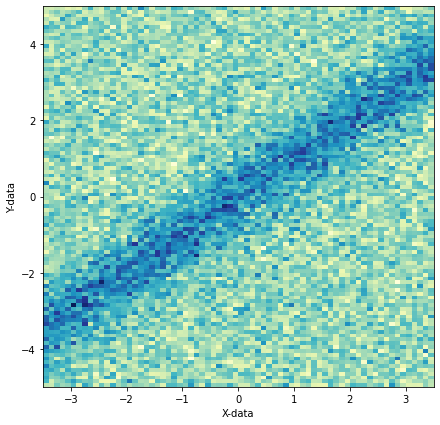

In [42]:
plt.figure(figsize=[7,7])

plt.imshow(data, 
           cmap='YlGnBu', # set the color map
           vmin=-1, vmax=2, # set the pixel value for the bottom and top of the color map
           extent=[cols[0], cols[-1], rows[0], rows[-1]], # Convert the plots ticks from pixels. 
           # extent order is left-x, right-x, bottom-y, top-y
           aspect='auto' # Adjust the plot to fit the figure (pixels will no longer be square)
          )

plt.xlabel('X-data')
plt.ylabel('Y-data')

Another type of plot that is used very often are histograms. The simplest of these is a histogram of a 1D array of data. Here we will plot the histogram of the residuals between our data and out model above using `plt.hist` conveniently, this outputs the bins and counts which we can reference later

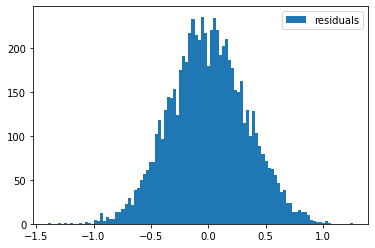

In [45]:
residuals = (data - model).flatten()

h = plt.hist(residuals, bins=100, label='residuals')
plt.legend(loc=0)

The last type of plot that we'll show here are 2D histograms. For cratesian bins, you can use `plt.hist2d` and for hexagonal bins you can use `plt.hexbin`. Fors, once again we need to make a dataset to plot:

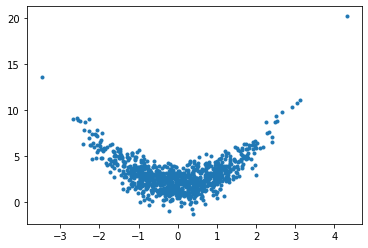

In [46]:
x_points = np.random.normal(size=1000)
y_points = x_points**2 + np.random.normal(size=1000) + 2

plt.plot(x_points, y_points, '.')

We can now instead of plotting this data as a messy spread of points, we can bin these points together. 

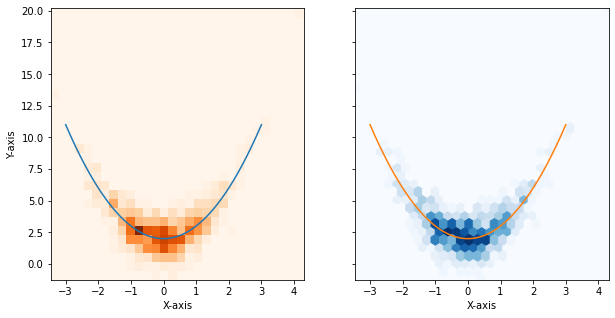

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=2,
                        sharex=True, sharey=True, 
                        gridspec_kw={'width_ratios': [1,1], 'height_ratios': [1]}, 
                        figsize=[10,5])

axs[0].hist2d(x_points, y_points, 
              bins=30, 
              cmap='Oranges')
axs[0].set_ylabel('Y-axis')
axs[0].set_xlabel('X-axis')
axs[1].hexbin(x_points, y_points, 
              gridsize=30, 
              cmap='Blues')
axs[1].set_xlabel('X-axis')

xmod = np.linspace(-3,3,1000)
ymod = xmod**2 + 2
axs[0].plot(xmod, ymod, '-', c='C0')
axs[1].plot(xmod, ymod, '-', c='C1')


Of course, as I've just shown above, you don't need to keep yourself to a single plot per figure! If you want to show multiple plots in a single figure you can alway make use of `plt.subplots` as I did above.

## Scipy

The **scipy** module has a slew of useful components, including integration (`scipy.integration`), special mathematical functions (`scipy.special`) and a large library dedicated to statistics (`scipy.stats`). 

All of these are worthy of exploring, but for the sake of time, here we fill focus on fitting data. In this example, we will use `scipy.optimize.curve_fit`, though `scipy.optimize` contains many more useful tools and alternate methods for fitting models to data.

Suppose in this example we would like to fit a model to the residuals we computed earlier. First we need to construct the model we plan to fit to the data:

In [49]:
from scipy.optimize import curve_fit as cf

def model(x, A, B, s, mu):
    gauss = np.exp(-(x-mu)**2 / (2*s**2))
    return A * gauss + B


This is simply a Gaussian, where A is the amplitude of the peak, B is the vertical offset, s is the width and mu is the horizontal offset. 

We now need to provide some initial guesses for the parameters.

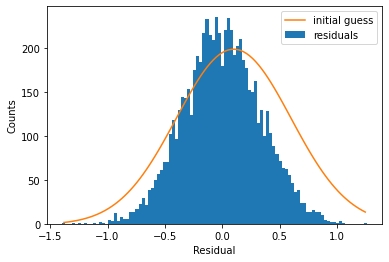

In [50]:
p0 = [200, -1, 0.5, 0.1] # Initial guess for A, B, s, mu in order

counts, bin_edges, _ = plt.hist(residuals, bins=100, label='residuals')
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

plt.plot(bin_centers, model(bin_centers, *p0), '-', label='initial guess')

plt.xlabel('Residual')
plt.ylabel('Counts')
plt.legend(loc=0)

This isn't the best guess in the world, but it's an ok starting point. Now we can try and fit to get an optimized guess of the model's parameters. 

`curve_fit` will output the optimal parameters and the corresponding covariance matrix, which we'll name `popt` and `pcov` below:

[ 2.20885022e+02 -2.25387117e-01  3.36566216e-01 -5.34092183e-03]


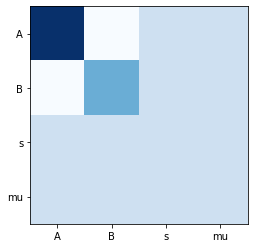

In [51]:
popt, pcov = cf(model, bin_centers, counts, 
                p0=p0, 
                sigma=None,  # errors on the data
                absolute_sigma=True, # set the outputed covariance matrix to be in absolute terms rather than relative
                maxfev=1000) # number of trials allowed to converge to a best fit

f, ax = plt.subplots(1,1)

ax.imshow(pcov, cmap='Blues')

ax.set_xticks([0,1,2,3])
ax.set_yticks([0,1,2,3])
ax.set_xticklabels(['A', 'B', 's', 'mu'])
ax.set_yticklabels(['A', 'B', 's', 'mu'])

print(popt)

We can now check that our fitted model is better than our initial guess

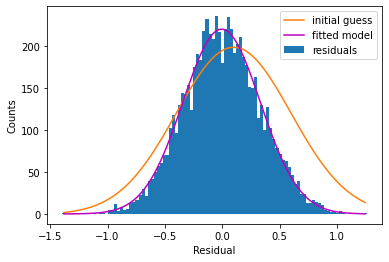

In [52]:
_ = plt.hist(residuals, bins=100, label='residuals')
plt.plot(bin_centers, model(bin_centers, *p0), '-', label='initial guess')
plt.plot(bin_centers, model(bin_centers, *popt), 'm-', label='fitted model')

plt.xlabel('Residual')
plt.ylabel('Counts')
plt.legend(loc=0)

Bear in mind that this was a very simple model with a very good dataset, and so fitting data may not be quite so easy in the future!

## Astropy

**astropy**, as its name suggests, is a python module dedicated for use in astronomy. Again, it has a large amount of functionality, much of which won't be covered here, so feel free to look at the documentation yourself to learn more.

### Units

Astropy allows you to express your data in physical units. This gives you a good way to keep track of the outputs of your computations and serves as an easy sanity check. If your energy has units of time, then something has gone wrong!

This also means you don't need to worry about doing any unit conversion calculations yourself so long as you're consistent in using astropy units.

In [53]:
import astropy.units as u

Suppose we want to define the speed of light, and figure out how long it takes light to travel a distance of 1 parsec. 

In [54]:
c = 299458792 * u.m / u.s 

print(c)

299458792.0 m / s


In [55]:
distance = 1*u.pc
time = distance / c

print(time)

3.3393576235357286e-09 pc s / m


This is a strange result. The units of pc and m should be able to cancel each other out, but they won't do so by default. To force this, we can cast the units to some unit convention like SI or CGS

In [56]:
print(time.si)

103041809.55445756 s


This isn't very useful though. Perhaps years would be a better unit to use in this case. We can instead choose to explicitly cast our time quantity to units of years:

In [57]:
print(time.to(u.yr))

3.2651979096780983 yr


### Constants

Of course, we didn't actually need to define the speed of light. Astropy also contains a library of constants, which all come with units already built in.

In [58]:
import astropy.constants as c

In [59]:
print(c.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2014


As you can see this even includes errors on the loaded constants. Let's try some less common constants.

In [60]:
R_e = c.R_earth
R_s = c.R_sun

print(R_s/R_e)

109.07637070600963


### Fits tables

A common file format you are likely to run into in astronomy is called **FITS** (Flexible Image Transport System). Astropy comes packaged with a means of reading in FITS data.  

In [61]:
from astropy.io import fits

To open a fits file, you first need to open it with `hdul = fits.open('path/to/file.fits')`. 

FITS files contain a series of **headers** with information on their corresponding data. To view the types of data contained in the FITS file, you can check the output of `hdul.info()`. This will provide you a list of keys. For each key, you can then read the corresponding header information with `hdul['key_i'].header` and data table with `hdul['key_i'].data`.

Once you are done the file, remember to close it with `hdul.close()` as keeping the file open restrics your computer's ability to function (only a set number of files can be open at once), and runs the risk of corrupting the contained data in the event of a crash.

In [ ]:
### Data tables

## Other useful modules

Here we have only covered some limited aspects of the modules introduced above. Much of the initial learning curve in python is learning what you can do with the various pre-existing modules to reduce what you actually need to code yourself.

There are also some useful modules that we haven't covered here which are extremely useful in their own right. Some of these have overlap with one another or even the modules presented above, but all can allow you to drastically improve what you can do in python.

* Modules allowing interactions with your computer outside of python 
    * sys
    * os
    * subprocess
* Modules dealing with processing time based data
    * time
    * datetime
    * (astropy)
* Modules for data processing
    * pandas
    * tensorflow
    * (scipy)
    * (numpy)
    * (astropy)
* Modules for altering how you do math in python
    * sympy
    * decimal
    * uncertainties
* Modules dedicated to plotting
    * healpy
    * seaborn
    * (matplotlib)


